### 제시된 데이터셋을 활용해서 미완성 문제 풀이하기

1. ANN에서는 은닉계층이 하나. DNN은 수십에서 수백개의 은닉 계층으로 구성
- DNN에서는 Sigmoid 함수처럼 입력을 특정 범위로 줄이는 활성화 함수들은 Vanishing Gradient 문제가 발생할 수 있음.  Vanishing Gradient 극복하는 활성함수 ReLu 함수를 사용 
- 다중 분류 시 활성 함수는 Softmax를 많이 사용 


###### 활성함수

1. 중간층 활성함수 : relu

2. 출력층 활성함수<br>
    - 다중 분류 - softmax
    - 이진 분류 - sigmoid or softmax
    - 회귀 - relu

###### 손실함수  ( loss함수, 목적함수, cost함수)
1. softmax가 출력 활성화 함수인 경우 : categorical_crossentropy
2. sigmoid가 출력 활성화 함수인 경우 : binary_crossentropy


### 문제1 :  ? 피마 인디언의 당뇨병 예측 실행

1. 문제 - 비만은 유전일까? 식습관 조절에 실패한 자신의 탓일까?
- 비만이 유전 및 환경, 모두의 탓이라는 것을 증명한 좋은 사례 
- 미국 남서부에 살고 있는 피마 인디언의 사례
- 피마 인디언은 1950년대까지만 해도 비만인 사람이 단 한명도 없었다 함
- 현재는 전체 부족의 60%가 당뇨, 80%가 비만으로 고통받고 있음
- 사유? 생존하기 위해 영양분을 체내에 저장하는 뛰어난 능력을 물려 받은 인디언들이 미국의 기름진 패스트푸트 문화를 만나면서 발생된 현상
- dataset
    1. sample 수 : 768
    - 속성 : 8<br>
    과거 임신 횟수, 포도당 부하 검사 2시간 후 공복 혈당 농도(mm Hg), 확장기 혈압, 삼두근 피부 주름 두께(mm), 당뇨병 가족력, 나이등
    - 클래스 : 당뇨(1), 당뇨 아님(0)
    
    

In [12]:
from keras.models import Sequential
from keras import Dense
import numpy

In [27]:
# seed 값 생성
seed = 0
numpy.random.seed(seed)
#tf.set_random_seed(seed)

# 데이터 로드
dataset = numpy.loadtxt("dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# ??? 모델의 설정
'''
Dense(출력 뉴런의 수, 입력 뉴런의 수, 활성화 함수)
'''
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(3,)))

# 모델 컴파일
'''
loss : 한번 신경망이 실행될 때마다 오차 값을 추적하는 함수
optimizer : 오차를 어떻게 줄여 나갈지 정하는 함수
metrics : 이러한 평가 기준에는 모델의 학습에는 영향을 미치지 않지만, 
          학습 과정 중에 제대로 학습되고 있는 지 살펴볼 수 있음
          케라스에서는 다중클래스분류 문제에서 평가기준을
          accuracy로 지정했을 경우 내부적으로 categorical_accuracy()
          함수를 이용하여 정확도가 계산
'''
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
'''
은닉층, relu 함수, 최적화등이 조합된 모델 생성
- 학습 과정에서 오차 역전파시 좋은 성능의 함수 : relu
'''


# 모델 실행
# 한번 연산시 10개씩 연산 하겠다는 의미
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
# 딥러닝 모델이 어느 정도 정확하게 예측하는지 검검하는 함수
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

ValueError: Error when checking input: expected dense_7_input to have shape (3,) but got array with shape (8,)

### 문제 2 : 폐암 수술 환자의 생존률 예측하기
dataset
    1. 폴란드의 브로츠와프 의과대학에서 2013년 공개한 폐암 수술 환자의 
      수술 전 진단 데이터와 수술 후 생존 결과를 기록한 실제 의료 기록 데이터

    2. 구성 : 470개의 row와 18개 항목
    3. 특징(정보, 속성)
        - 종양의 유형, 폐활량, 호흡 곤란 여부, 고통 정도, 기침, 흡연, 천신 여부등 17개
    4. 클래스(label, target)
        - 생존 여부
        1 : 수술 후 생존 / 0 : 수술 후 사망


In [26]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옴
from keras.models import Sequential
from keras.layers import Dense

# 준비된 수술 환자 데이터를 load
Data_set = numpy.loadtxt("dataset/ThoraricSurgery.csv", delimiter=",")

# ???환자의 기록과 수술 결과를 X와 Y로 구분하여 저장
X = Data_set[:,0:17]
Y = Data_set[:,17]
# ???딥러닝 구조를 결정(모델을 설정하고 실행)

model = Sequential()

model.add(Dense(30,input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 실행
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=20, verbose=0)

# 결과를 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

470/470 [==============================] - 0s 77us/step

 Accuracy: 0.8511


### 문제 3 : 이미지를 기반으로 유의미한 예측을 하기 위한 이미 진행된내용의 DeepLearning 소스를 단계별로 분석하기

1. 데이터셋 구축(정제 완료..)
- 0~9까지의 숫자 구분을 위한 문제
- 클래스 0~9까지 10개
- 개발 단계(전처리)
>  검은 부분/흰 부분 구분해서 숫자로 변환<br>
라벨링해서 분류<br>
원핫벳터...

In [28]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys
import os

In [29]:
seed = 0
numpy.random.seed(seed)

# mnist에서 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습 데이터 : %d 개" % (X_train.shape[0]))
print("테스트 데이터 : %d 개" % (X_test.shape[0]))

학습 데이터 : 60000 개
테스트 데이터 : 10000 개


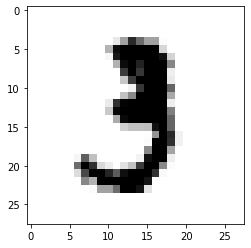

In [34]:
#그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[10], cmap='Greys')
plt.show()

In [33]:
# 코드로 확인
for x in X_train[10]:
    for i in x:
        sys.stdout.write("%d\t" % i)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	42	118	219	166	118	118	6	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	103	242	254	254	254	254	254	66	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	18	232	254	254	254	254	254	238	70	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	104	244	254	224	254	254	254	141	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	207	254	210	254	254	254	34	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	84	206	254	254	254	254	41	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	24	209	254	254	254	171	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	91	137	253	254	254	254	112	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	40	214	250	254	254	254	254	254	34	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	81	247	254	254	254	254	254	254	146	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	110	246	254	254	254	254	254	171	0	0	0	0	

In [ ]:
# 차원 변환  숫자 하나가 가로 28 * 28 즉 784 개의 점으로 구성된 2차원 구조
''' 정규화
차원 변환 단계 
- 0~255까지의 숫자로 구성된 이미지 데이터(2차원)
- 1차원으로 차원 변환 
- 0과 1에 해당하는 구조로 변환  : float으로 변환후에 255로 나눔
'''
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype("float64")
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [ ]:
X_train

In [ ]:
print("label : %d " % (Y_class_train[0]))

In [ ]:
# 분류를 위한 사전 작업 : 원핫 벡터
# 0~9 : 1 [0, 1, 0, 0, 0,...]
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])